# Snow Model Analysis

In [22]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import rasterio as rio
import pickle

In [2]:
#sm = xr.open_dataset('../data/snowmodel/sm_swed_04_01_2000_2021.nc').rio.write_crs('epsg:4326',inplace=True)

In [33]:
sm = xr.open_dataset('../data/snowmodel/sm_swed_04_01_2000_2021.nc', decode_coords="all")

In [35]:
sm.rio.crs

CRS.from_epsg(4326)

In [36]:
sm = sm.transpose('Year', 'y', 'x')

In [27]:
swe_reanalysis = xr.open_dataset('../data/reanalysis/swe_reanalysis_ucrb.nc')

In [3]:
sm

<xarray.Dataset> Size: 4GB
Dimensions:      (x: 5871, y: 6887, Year: 22)
Coordinates:
  * x            (x) float64 47kB -112.4 -112.4 -112.4 ... -105.5 -105.5 -105.5
  * y            (y) float64 55kB 43.55 43.55 43.55 43.55 ... 35.46 35.46 35.46
  * Year         (Year) int64 176B 2000 2001 2002 2003 ... 2018 2019 2020 2021
    spatial_ref  int64 8B 0
Data variables:
    swed         (y, x, Year) float32 4GB ...
    hgt          (y, x) float32 162MB ...

In [24]:
ucrb = pickle.load(open('../data/misc/ucrb.pkl', 'rb'))

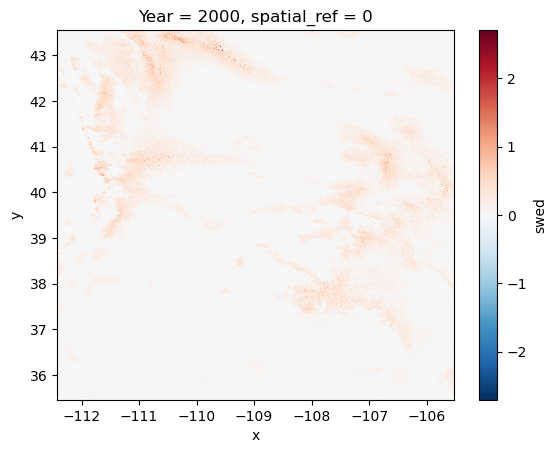

In [5]:
sm.swed[:,:,0].plot()

In [12]:
sm_utm = sm.rio.reproject('epsg:32612')

In [13]:
sm_utm

<xarray.Dataset> Size: 4GB
Dimensions:      (x: 5266, y: 7674, Year: 22)
Coordinates:
  * x            (x) float64 42kB 3.707e+05 3.708e+05 ... 9.967e+05 9.968e+05
  * y            (y) float64 61kB 4.836e+06 4.836e+06 ... 3.924e+06 3.924e+06
  * Year         (Year) int64 176B 2000 2001 2002 2003 ... 2018 2019 2020 2021
    spatial_ref  int64 8B 0
Data variables:
    swed         (Year, y, x) float32 4GB nan nan nan nan ... nan nan nan nan
    hgt          (y, x) float32 162MB nan nan nan nan nan ... nan nan nan nan

In [18]:
sm_utm.x[51] - sm_utm.x[50]

<xarray.DataArray 'x' ()> Size: 8B
array(118.91750257)
Coordinates:
    spatial_ref  int64 8B 0

In [19]:
sm_utm.y[51] - sm_utm.y[50]

<xarray.DataArray 'y' ()> Size: 8B
array(-118.91750257)
Coordinates:
    spatial_ref  int64 8B 0

In [38]:
sm_clip = sm.swed.rio.clip(ucrb.geometry)

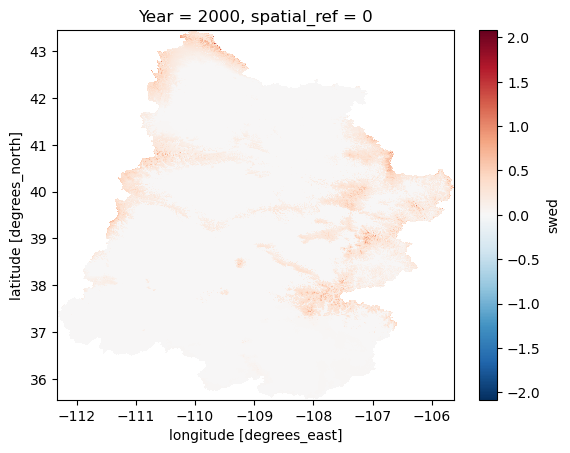

In [39]:
sm_clip[0].plot()

In [40]:
sm_match = sm_clip.rio.reproject_match(swe_reanalysis.SWE_Post)

In [42]:
sm_match.rio.crs

CRS.from_epsg(4326)

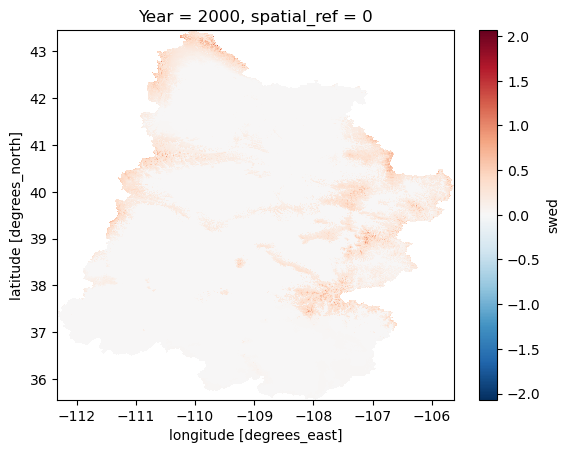

In [30]:
sm_match.swed[0].plot()

In [41]:
sm_match.to_netcdf('../data/snowmodel/sm_swed_ucrb_match_2000_2021.nc')

In [32]:
sm_match.attrs

{}